In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define parameter

In [3]:
f =    # frequency in GHz
a = 0.0005    # half-width of slab in cm 
n1 = 1.6    # refractive index of core
n2 = 1.45    # refractive index of cladding
Nit = 3   # number of Newton iterations (default Nit=3)
c0 = 30 # c0 in GHz x cm

In [4]:
k0 = (2*(np.pi)*f)/c0 # free-space wavenumber
k0 

40536.59832779982

In [9]:
NA = np.sqrt(np.square(n1)-np.square (n2)) # numerical aperture
NA

0.67638746292343443

In [10]:
R = k0*a*NA                # circle radius
R

1.3709223449243426

In [11]:
M = np.floor (2*R/np.pi)   # number of modes (M+1)
M

0.0

In [12]:
m = np.linspace(0,M,4)     # mode numbers
m

array([ 0.,  0.,  0.,  0.])

In [13]:
Rc = (m*np.pi)/2  # cutoff radii
Rc

array([ 0.,  0.,  0.,  0.])

In [14]:
r = R-Rc 
r

array([ 1.37092234,  1.37092234,  1.37092234,  1.37092234])

In [16]:
V = ((np.pi/4 + Rc)/np.cos(np.pi/4) - Rc)/np.sqrt(np.log(1.25))
V

array([ 2.35132526,  2.35132526,  2.35132526,  2.35132526])

In [17]:
u1 = (np.sqrt(1 + 2*R*r) - 1)/R    # solutions near cutoff
u1

array([ 0.86181414,  0.86181414,  0.86181414,  0.86181414])

In [18]:
u2 = (R-m)/(R+1)*np.pi/2           # solutions far from cutoff
u2

array([ 0.9082709,  0.9082709,  0.9082709,  0.9082709])

In [19]:
a1= np.exp(-(r)*(r)/(V*V)) #interpolating weights for u1
a1

array([ 0.71181413,  0.71181413,  0.71181413,  0.71181413])

In [20]:
a2 = 1 - a1   #interpolating weights for u2
a2

array([ 0.28818587,  0.28818587,  0.28818587,  0.28818587])

In [21]:
u = Rc + a1*u1 + a2*u2 
u

array([ 0.87520233,  0.87520233,  0.87520233,  0.87520233])

In [22]:
kc = u/a
kc

array([ 17504.04650865,  17504.04650865,  17504.04650865,  17504.04650865])

In [25]:
v = np.sqrt ((R*R)-(u*u))
v

array([ 1.05520091,  1.05520091,  1.05520091,  1.05520091])

In [26]:
be = np.sqrt(n1*n1*k0*k0-kc*kc)
be

array([ 62451.90800957,  62451.90800957,  62451.90800957,  62451.90800957])

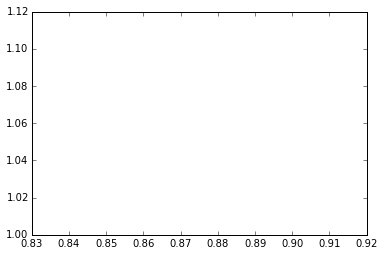

In [27]:
plt.plot(u,v)

In [29]:
E1 = 1
x = np.linspace (-a,a,10)
x
s0=17504.04650865*x
s0
Ey0 = E1*np.cos (s0)
Ey0

array([ 0.64084155,  0.77712424,  0.88410387,  0.95774656,  0.99527546,
        0.99527546,  0.95774656,  0.88410387,  0.77712424,  0.64084155])

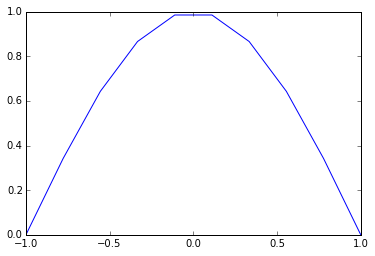

In [66]:
plt.plot (x,Ey0)


In [41]:
s1 = 6.8588*x
s1

array([-5.281276  , -4.10765911, -2.93404222, -1.76042533, -0.58680844,
        0.58680844,  1.76042533,  2.93404222,  4.10765911,  5.281276  ])

In [42]:
Ey1 = E1*np.sin (s1)
Ey1

array([ 0.84250105,  0.82265571, -0.20606352, -0.98207423, -0.5537062 ,
        0.5537062 ,  0.98207423,  0.20606352, -0.82265571, -0.84250105])

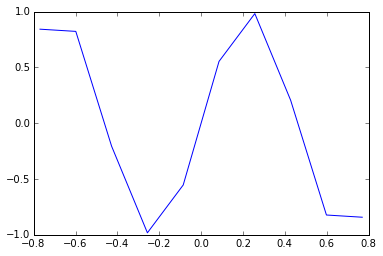

In [43]:
plt.plot (x,Ey1)

In [94]:
s2=7.82217351*x
s2

array([-3.91108675, -3.04195636, -2.17282597, -1.30369559, -0.4345652 ,
        0.4345652 ,  1.30369558,  2.17282597,  3.04195636,  3.91108675])

In [96]:
Ey2 = E1*np.cos (s2)
Ey2

array([-0.71826275, -0.99504041, -0.56631645,  0.2639361 ,  0.90705319,
        0.90705319,  0.2639361 , -0.56631645, -0.99504041, -0.71826275])

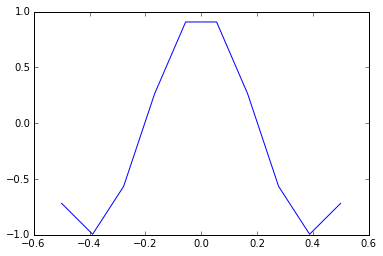

In [97]:
plt.plot (x,Ey2)